In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



2025-01-28 17:49:40.249206: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-28 17:49:40.256378: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-28 17:49:40.299010: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-28 17:49:40.349935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738111780.392892   17766 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738111780.40

# Load Data

In [2]:
# Load the Fashion MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

## Plot Data

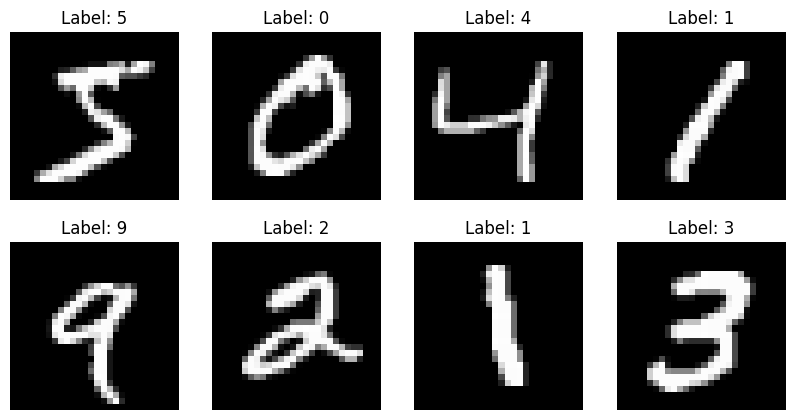

In [3]:
plt.figure(figsize=(10, 5))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.show()

In [4]:
# Check the shape of the data
# Each image is 28 x 28 pixels
print(x_train[1].shape)

(28, 28)


# Random Forest

## Data Prep

In [5]:
# Many machine learning models expect data to be in a 2D table, where each row is a sample and each column is a feature.
# We can flatten the 28x28 images into a single row of 784 pixels.

# So, first we need to prepare/alter the images so that a random forest can use them.
# The random forest will use the pixel values as features, so give it a dataset of flat vectors like
# the one we used for the fashion_mnist example.

x_train_flat = x_train.reshape(x_train.shape[0], -1)
print(x_train_flat.shape)
print(y_train.shape)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

(60000, 784)
(60000,)


In [6]:
# There are 10 classes in the MNIST dataset, just like the fashion_MNIST.
# You need to select 3 classes to train your model on. You get to pick the classes you want to use, but 
# Please choose classes that are similar to each other.
# For example, you could choose 3, 5, and 8. Or 4, 7, 9. Or other combinations that you deam appropriate.
# Please don't choose digits that are easy to tell apart, like 0, 1, and 5. Or 1, 2, and 3.

# You can totally copy code over from the fmnist_examples notebook and modify it.
# You can use chatGPT, copilot, google, or other AI or online resources.
# Use each other, the goal is to complete the objective and maybe learn something new, not to struggle to make up code on your own.
# We have prior notebooks, chatGPT, the internet, and each other for the rapids projects, so use them here if they will help!

# Extract the 3 classes from the training data

train_filter = (y_train == 5) | (y_train == 6)
x_train_5_6 = x_train_flat[train_filter]
y_train_5_6 = y_train[train_filter]

# Extract the 3 classes from the test data

test_filter = (y_test == 5) | (y_test == 6)
x_test_5_6 = x_test_flat[test_filter]
y_test_5_6 = y_test[test_filter]

# Maybe check the shape of the data is correct

print(f'x_train_5_6 shape: {x_train_5_6.shape}')
print(f'y_train_5_6 shape: {y_train_5_6.shape}')
print(f'x_test_5_6 shape: {x_test_5_6.shape}')
print(f'y_test_5_6 shape: {y_test_5_6.shape}')

x_train_5_6 shape: (11339, 784)
y_train_5_6 shape: (11339,)
x_test_5_6 shape: (1850, 784)
y_test_5_6 shape: (1850,)


## Simple Model Fit

In [7]:
# Fit a simple random forest. Make sure it has at least 100 trees, Probably not more than 1000 trees.

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train_5_6, y_train_5_6)

# Generate predictions on the test set and calculate the overall accuracy of the model on the test set.

y_test_pred = rf.predict(x_test_5_6)
test_accuracy = accuracy_score(y_test_5_6, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.9891891891891892


# Tune Model Fit

In [8]:
# Now try to tuning the model. 
# This part can take a while, maybe several minutes.

param_grid = {
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200, 300]
}

rfc = RandomForestClassifier(n_estimators=200, random_state=42)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_5_6, y_train_5_6)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best cross-validation score: {best_score}')

# Generate predictions on the test set and calculate the overall accuracy of the model on the test set.

best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(x_test_5_6)

# Does tuning the model improve the accuracy? How much?
# Was the tuning accuracy worth the extra time?

print("The accuracy went down by 0.001, (not a big difference in performance).")
print("The tuning accuracy was not worth the extra time.")

Best parameters: {'max_features': 'sqrt', 'n_estimators': 300}
Best cross-validation score: 0.9880940322345998
The accuracy went down by 0.001, (not a big difference in performance).
The tuning accuracy was not worth the extra time.


Test Accuracy: 0.9897297297297297
[[882  10]
 [  9 949]]


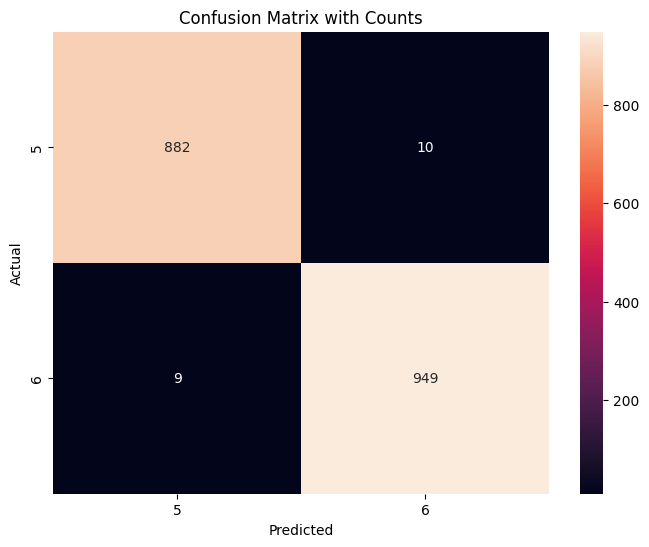

There are proportionally more misclassifications of '5' as '6'.
This is probably because there are more 6's in the training set.


In [9]:
# Compute and plot a confusion matrix.

test_accuracy = accuracy_score(y_test_5_6, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

conf_matrix = confusion_matrix(y_test_5_6, y_test_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=[5, 6], yticklabels=[5, 6])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Counts')
plt.show()

# Where are misclassifications occurring?

print("There are proportionally more misclassifications of '5' as '6'.")
print("This is probably because there are more 6's in the training set.")

[[0.625 0.375]
 [0.155 0.845]
 [0.995 0.005]
 [0.    1.   ]
 [0.06  0.94 ]]


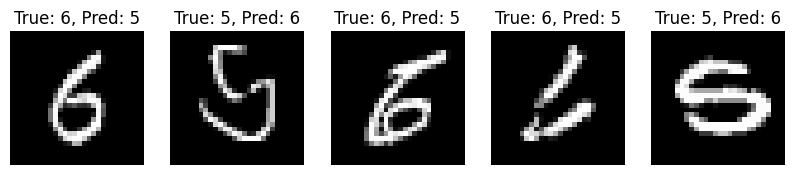

I'm not sure why the model failed to predict the first image, but the rest of the images seem more ambiguous.
I can see why the model struggled with the last four images.


In [10]:
# Plot some of the misclassifications.

y_test_pred_proba = rf.predict_proba(x_test_5_6)
print(y_test_pred_proba[:5])

misclassified_indices = [i for i in range(len(y_test_5_6)) if y_test_pred[i] != y_test_5_6[i]]

misclassified_probs = [y_test_pred_proba[idx][1] if y_test_5_6[idx] == 6 else y_test_pred_proba[idx][0] for idx in misclassified_indices]

worst_misclassified_indices = [misclassified_indices[i] for i in sorted(range(len(misclassified_probs)), key=lambda i: misclassified_probs[i], reverse=True)[:5]]

plt.figure(figsize=(10, 5))

for i, idx in enumerate(worst_misclassified_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_5_6[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test_5_6[idx]}, Pred: {y_test_pred[idx]}')
    plt.axis('off')

plt.show()

# Can you see why the model made the misclassifications it did?

print("I'm not sure why the model failed to predict the first image, but the rest of the images seem more ambiguous.")
print("I can see why the model struggled with the last four images.")